In [0]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5)
import seaborn as sns

In [0]:
from google.colab import files
uploaded = files.upload()

import io
my_data = pd.read_csv(io.BytesIO(uploaded['Python_project_eda.csv']))

Saving Python_project_eda.csv to Python_project_eda.csv


In [0]:
# View data head
my_data.head(5)

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
0,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,18321316048201303366,1
1,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,13705367724816913241,1
2,0,NaN,IN,0,False,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,6605724765451655114,0
3,0,1.0,CA,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2340067911948261502,1
4,7,1.0,PL,1,True,1.0,1.0,NaN,0.0,1.0,1,0.0,0.0,11891045596810635427,1


In [0]:
# shape of data
my_data.shape

(566699, 15)

## **Check Missing Value**

In [0]:
# Remove Duplicates
my_data = my_data.drop_duplicates()

In [0]:
# Check missing value
my_data.shape[0] - my_data.count()

buyer_week_before              0
clicked_buy_before         71059
country                    12524
existing_buyer                 0
initial_fop_set                0
made_purchase_before       71059
saw_cart_before            71059
spend_usd_next_14_days    477667
user_added_credit_card    396102
user_added_dcb            396102
user_added_fop                 0
user_added_gift_card      396102
user_added_paypal         396102
user_id                        0
visit_before                   0
dtype: int64

In [0]:
# How many users never visit before
len(my_data[my_data['visit_before'] == 0])

71059

In [0]:
# remove NA in payment methods
df = my_data.dropna(subset = ['made_purchase_before', 'clicked_buy_before', 'country', 'saw_cart_before'])

# fill na with 0
df = df.fillna(0)

In [0]:
df.shape[0] - df.count()

buyer_week_before         0
clicked_buy_before        0
country                   0
existing_buyer            0
initial_fop_set           0
made_purchase_before      0
saw_cart_before           0
spend_usd_next_14_days    0
user_added_credit_card    0
user_added_dcb            0
user_added_fop            0
user_added_gift_card      0
user_added_paypal         0
user_id                   0
visit_before              0
dtype: int64

In [0]:
# The length of the data now
len(df)

484357

## **Exploration - Spend USD in next 14 Days**

In [0]:
spend_usd_next_14_days = df.spend_usd_next_14_days

In [0]:
spend_usd_next_14_days.describe()

count    484357.000000
mean         12.066857
std          94.333699
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       22519.570000
Name: spend_usd_next_14_days, dtype: float64

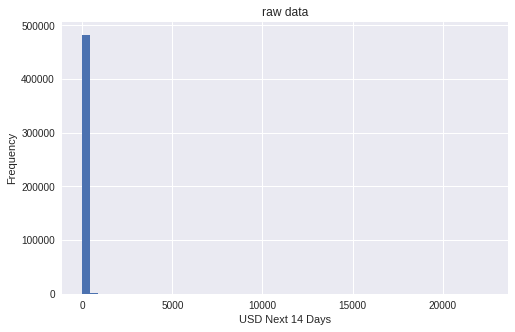

In [0]:
plt.hist(spend_usd_next_14_days, bins = 50)
plt.xlabel("USD Next 14 Days")
plt.ylabel("Frequency")
plt.title("raw data")
plt.show()

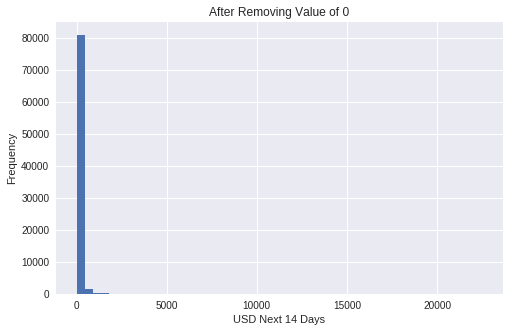

In [0]:
# Remove value of 0
plt.hist(spend_usd_next_14_days[spend_usd_next_14_days != 0], bins = 50)
plt.xlabel("USD Next 14 Days")
plt.ylabel("Frequency")
plt.title("After Removing Value of 0")
plt.show()

In [0]:
n = len(spend_usd_next_14_days) + 0.0
print('# users who spend larger than 100 USD', len(spend_usd_next_14_days[spend_usd_next_14_days >= 100]) / n)
print('# users who spend larger than 500 USD', len(spend_usd_next_14_days[spend_usd_next_14_days >= 500]) / n)

# users who spend larger than 100 USD 0.027572637538014314
# users who spend larger than 500 USD 0.003749300619171396


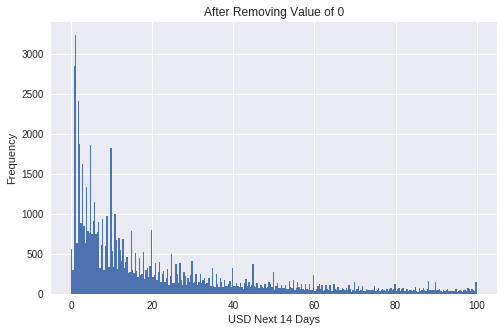

In [0]:
plt.hist(spend_usd_next_14_days[(spend_usd_next_14_days <= 100) & (spend_usd_next_14_days != 0)], bins = 300)
plt.xlabel("USD Next 14 Days")
plt.ylabel("Frequency")
plt.title("After Removing Value of 0")
plt.show()

In [0]:
# overall spend rate
population_spend_rate = np.mean(spend_usd_next_14_days != 0)

# If purchased before...
purchased = df[df['made_purchase_before'] == 1]
purchased_spend_rate = len(purchased[purchased['spend_usd_next_14_days'] != 0]) / (len(purchased) + 0.0)

# print reuslts
print('The population spend rate is: ', population_spend_rate)
print('If purchased before, the spend rate is: ', purchased_spend_rate)

The population spend rate is:  0.17169154156954478
If purchased before, the spend rate is:  0.7309907664530816


## **Purchase Funnel**

In [0]:
# for each stage
n_total = len(my_data)
n_visited = len(df)
n_saw = df['saw_cart_before'].sum()
n_clicked = df['clicked_buy_before'].sum()
n_purchased = df['made_purchase_before'].sum()

# create dataframe 
funnel_df = pd.DataFrame(columns=['action', 'num', 'cr_stage'])
funnel_df['action'] = ['visited', 'saw', 'clicked', 'purchased']
funnel_df['num'] = [n_visited, n_saw, n_clicked, n_purchased]
# cr_stage = each action # / total #
funnel_df['cr_stage'] = np.array([n_visited, n_saw, n_clicked, n_purchased]) / n_total

# print table
print('Number of users and conversion rate for each stage:')
print(funnel_df)

Number of users and conversion rate for each stage:
      action       num  cr_stage
0    visited  484357.0  0.854699
1        saw  451933.0  0.797483
2    clicked  124233.0  0.219222
3  purchased  101911.0  0.179833


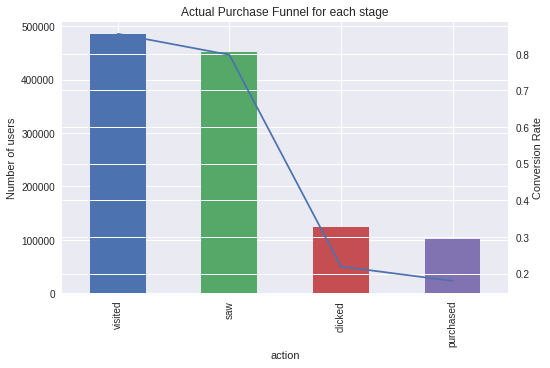

In [0]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
funnel_df.plot.bar('action','num', ax = ax1, legend=False)
funnel_df.plot('action','cr_stage', ax = ax2, legend=False)
ax1.set_ylabel('Number of users')
ax2.set_ylabel('Conversion Rate')
ax1.set_title('Actual Purchase Funnel for each stage')
plt.show()

In [0]:
funnel_df['stage_stage'] = ['begin_visited', 'visited_saw', 'saw_clicked', 'clicked_purchase']
funnel_df['cr_from_to'] = [n_visited/(n_total + 0.0), n_saw/n_visited, n_clicked/n_saw, n_purchased/n_clicked]
print('converstion rate stage-to-stage')
print(funnel_df[['stage_stage', 'cr_from_to']])

converstion rate stage-to-stage
        stage_stage  cr_from_to
0     begin_visited    0.854699
1       visited_saw    0.933058
2       saw_clicked    0.274893
3  clicked_purchase    0.820321


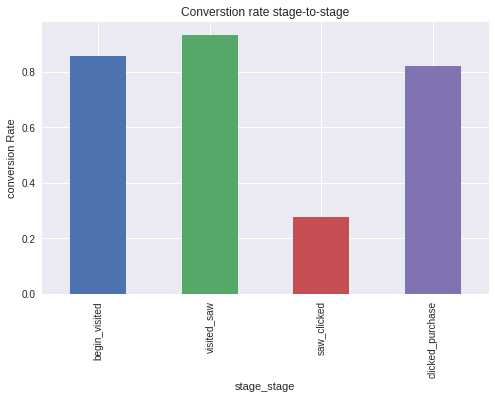

In [0]:
funnel_df.plot.bar('stage_stage', 'cr_from_to', legend = False)
plt.ylabel('conversion Rate')
plt.title('Converstion rate stage-to-stage')
plt.show()

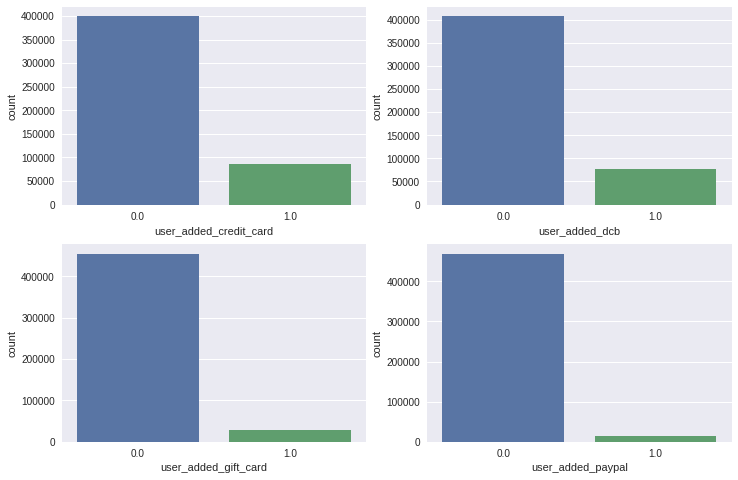

In [0]:
# find the distribution of payment method
target_features = ['user_added_credit_card', 'user_added_dcb', 'user_added_gift_card', 'user_added_paypal']

# categorical histograms
fig = plt.figure(figsize=(12, 8))
for i, column in enumerate(target_features):
  fig.add_subplot(2,2, i+1)
  sns.countplot(df[column]) # for discrete numbers
  # for continous number: sns.distplot(df[column])

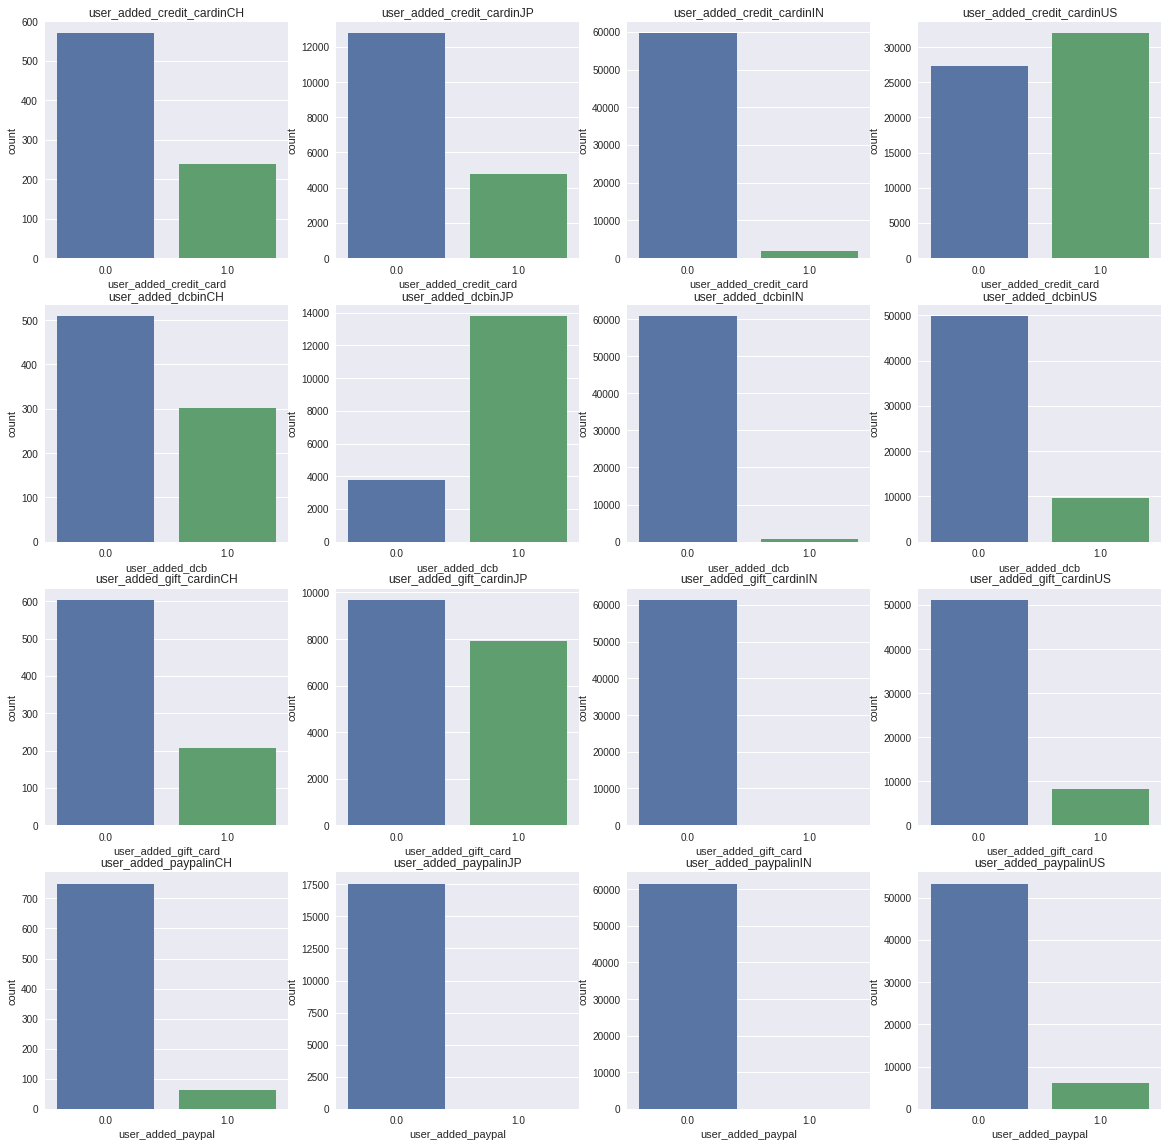

In [0]:
# Analyst through different country
country = ['CH', 'JP', 'IN', 'US']
count = 1
fig = plt.figure(figsize = (20, 20))
for i, fop in enumerate(target_features):
  for j, c in enumerate(country):
    fig.add_subplot(4,4, count)
    sns.countplot(df[df['country'] == c][fop])
    plt.title(fop + 'in' + c)
    count += 1

In [0]:
# Add multiple payment method vs. Add single payment method
def cr_fop(stage_interval, obj, df):
    tmp = df[df[obj] == 1][stage_interval].sum()
    return tmp[1] / tmp[0]

stage_interval = ['clicked_buy_before', 'made_purchase_before']

# Calculate multiple fop conversion rate
multiple_fop = []
for obj in target_features:
  cr = cr_fop(stage_interval, obj, df)
  multiple_fop.append(cr)

# Calculate single fop conversion rate
df['user_added_sum'] = df['user_added_credit_card'] + df['user_added_dcb'] + df['user_added_gift_card'] + df['user_added_paypal']
single_fop_df = df[df['user_added_sum'] == 1]
single_fop = []
for obj in target_features:
  cr = cr_fop(stage_interval, obj, single_fop_df)
  single_fop.append(cr)

In [0]:
single_fop_df[target_features].sum()

user_added_credit_card    51320.0
user_added_dcb            47251.0
user_added_gift_card       9326.0
user_added_paypal          5197.0
dtype: float64

FOP conversion rate:
                      fop  multiple_fop  single_fop
0  user_added_credit_card      0.863623    0.809564
1          user_added_dcb      0.814635    0.711575
2    user_added_gift_card      0.960136    0.953946
3       user_added_paypal      0.883465    0.784256


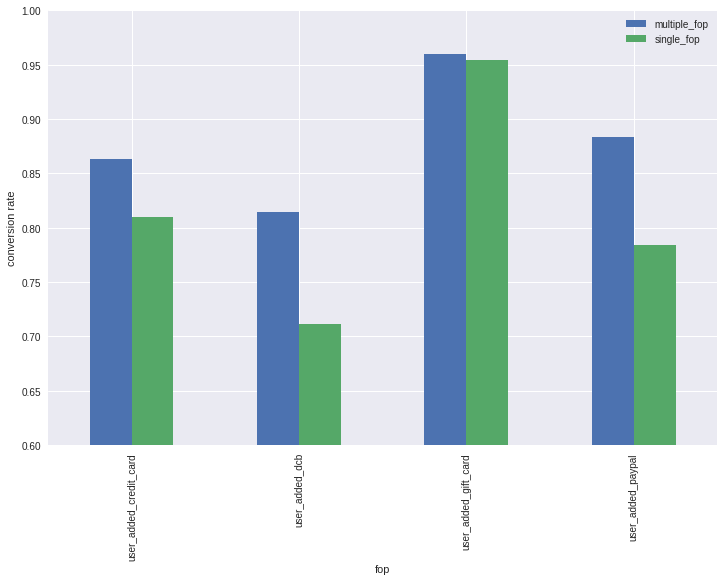

In [0]:
# draw bar plot
res_fop_df = pd.DataFrame(columns=['fop', 'multiple_fop', 'single_fop'])
res_fop_df['fop'] = target_features
res_fop_df['multiple_fop'] = multiple_fop
res_fop_df['single_fop'] = single_fop
print ('FOP conversion rate:')
print (res_fop_df)

res_fop_df.plot.bar(x = 'fop', y = ['multiple_fop', 'single_fop'], figsize = (12, 8))
plt.ylim(0.6, 1.0)
plt.ylabel('conversion rate')
plt.show()

## A/B Test

In [0]:
from google.colab import files
uploaded = files.upload()

import io
my_data = pd.read_csv(io.BytesIO(uploaded['Python_project_experiment.csv']))

Saving Python_project_experiment.csv to Python_project_experiment (1).csv


In [0]:
experiment = my_data
experiment.head(20)

,country,date,experiment_id,order_id,spend_usd,user_bucket,user_id,vertical
0,NaN,NaN,12624549,NaN,0.000000,3,1.655440e+19,NaN
1,NaN,NaN,12624548,NaN,0.000000,14,1.441150e+19,NaN
2,NaN,NaN,12624549,NaN,0.000000,20,8.425200e+18,NaN
3,NaN,NaN,12624549,NaN,0.000000,16,1.130270e+19,NaN
4,NaN,NaN,12624549,NaN,0.000000,14,1.399240e+18,NaN
5,NaN,NaN,12624549,NaN,0.000000,3,2.985330e+17,NaN
6,NaN,NaN,12624548,NaN,0.000000,6,7.166580e+18,NaN
7,NaN,NaN,12624549,NaN,0.000000,15,8.563610e+17,NaN
8,NaN,NaN,12624548,NaN,0.000000,4,7.069400e+18,NaN
9,NaN,NaN,12624549,NaN,0.000000,5,1.028540e+19,NaN


In [0]:
control = experiment[experiment['experiment_id'] == 12624549]['spend_usd']
case = experiment[experiment['experiment_id'] == 12624548]['spend_usd']

print('Total number of experiment users is', len(experiment))
print('Number of users in case group', len(case))
print('Number of users in control group', len(control))

Total number of experiment users is 49166
Number of users in case group 24695
Number of users in control group 24471


In [0]:
print('Statistical summary for case group:')
print(case.describe())
print('Statistical summary for control group:')
print(control.describe())

Statistical summary for case group:
count    24695.000000
mean         3.101232
std         11.647487
min          0.000000
25%          0.000000
50%          0.000000
75%          0.975661
max        119.990000
Name: spend_usd, dtype: float64
Statistical summary for control group:
count    24471.000000
mean         2.807225
std         10.974284
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        199.990000
Name: spend_usd, dtype: float64


In [0]:
# Calculate potential increasing revenue
(3.1 - 2.8) / 2.8

0.10714285714285725

In [0]:
# perform two sample one side t-test on case/control group
from scipy import stats
stats.ttest_ind(case, control, equal_var=False)

Ttest_indResult(statistic=2.880888081055276, pvalue=0.0039672827581814325)